In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
from utils.corpus import Corpus
from utils.visualization import Visualizer

corpus = Corpus(registry_path = 'utils/article_registry.json')

from utils.model import Model

model = Model(corpus, 90, seed=36775)
model.load_topics()

viz = Visualizer(model)

1950 - 1959: 38
1960 - 1969: 31
1970 - 1979: 53
1980 - 1989: 94
1990 - 1999: 108
2000 - 2009: 144
2010 - 2019: 341
2020 - 2029: 66
Loading topics from cache


## Area plot counting how many documents we have per area and per year

In [3]:
colors = ["ef476f","f78c6b","ffd166","06d6a0","118ab2","073b4c"][::-1]
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=[f"#{color}" for color in colors]) 

Text(0.5, 1.0, 'Ratio')

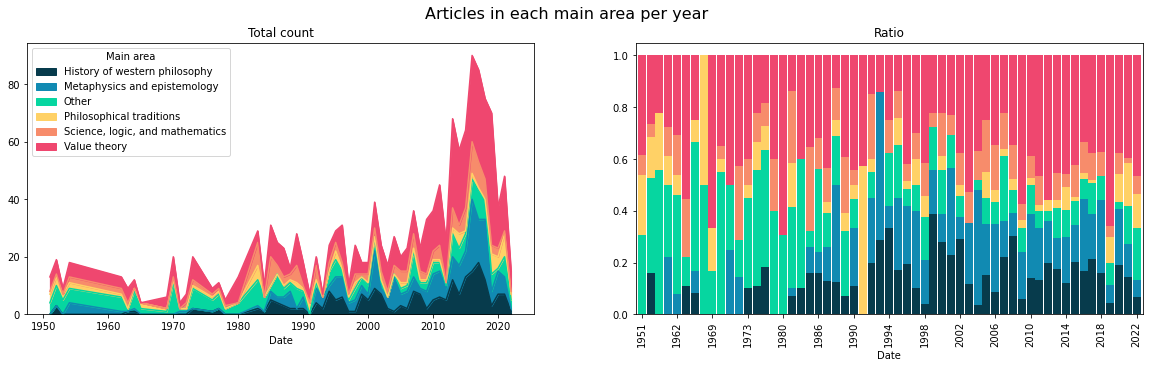

In [4]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

viz.plot_stream_graph(ax=ax1)
viz.plot_stream_graph(ax=ax2, normalized=True)

_.suptitle('Articles in each main area per year', fontsize=16)

ax1.set_title("Total count")

ax2.set_xticks(ax2.get_xticks()[::4], ax2.get_xticklabels()[::4])
ax2.get_legend().remove()
ax2.set_title('Ratio')

In [5]:
axs

NameError: name 'axs' is not defined

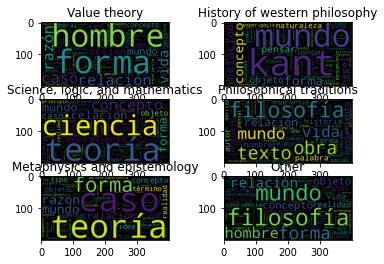

In [ ]:
_, axs = plt.subplots(3, 2)
for area, ax in zip(model.get_main_areas().keys(), axs.flatten()):
    viz.plot_wordcloud_per_main_area(area, ax=ax)

In [13]:
model.topics[74].docs[0][0].get_ref()

'Gonzalo Serrano Escallón (2021/12/15). Ideas y Valores. Antecedentes, comienzos y tropiezos'

TypeError: 'NoneType' object is not iterable

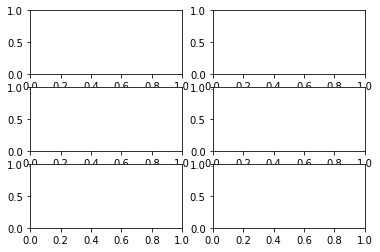

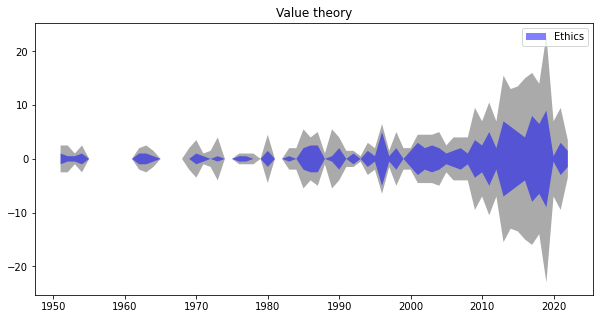

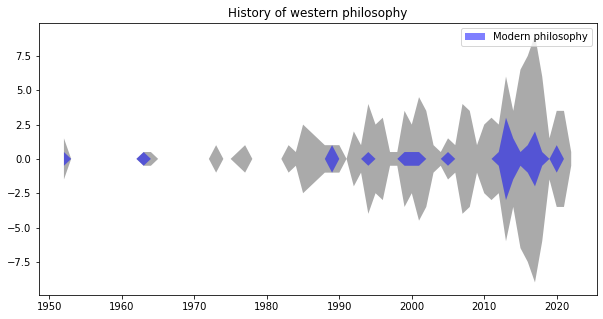

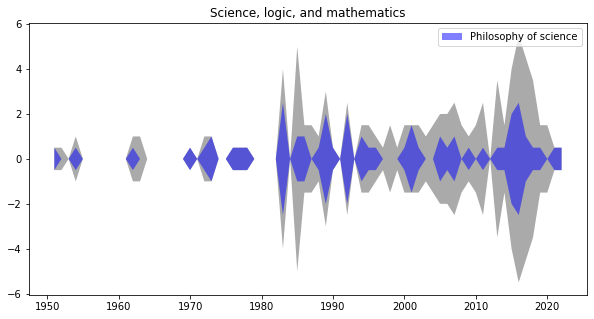

In [6]:
_, axs = plt.subplots(3, 2)
for area, ax in zip(model.get_main_areas().keys(), axs.flatten()):
    viz.plot_streamgraph_main_and_subarea(area)

# Exploring specific topics

In [35]:
model.topics[5].top_word_evolution_table()

,"(1950, 1960)","(1960, 1970)","(1970, 1980)","(1980, 1990)","(1990, 2000)","(2000, 2010)","(2010, 2020)","(2020, 2030)"
0,kant,kant,kant,kant,kant,kant,kant,kant
1,razón,razón,razón,razón,razón,razón,razón,razón
2,kantiano,kantiano,kantiano,kantiano,kantiano,kantiano,kantiano,kantiano
3,ilustración,ilustración,ilustración,ilustración,ilustración,ilustración,ilustración,ilustración
4,biblia,biblia,biblia,biblia,práctico,crítica,prejuicio,prejuicio
5,práctico,práctico,práctico,práctico,crítica,práctico,crítica,crítica
6,crítica,crítica,crítica,crítica,naturaleza,prejuicio,práctico,práctico
7,naturaleza,naturaleza,naturaleza,naturaleza,biblia,naturaleza,naturaleza,naturaleza
8,hombre,hombre,hombre,prejuicio,prejuicio,hombre,viii,hombre
9,prejuicio,prejuicio,prejuicio,hombre,hombre,viii,hombre,viii


In [5]:
import matplotlib as mpl
# 10 color cycle'
colors = ["#8eac65","#f4b393","#140152","#22007c","#0d00a4", '#321325', '#fcdc4d', '#e01a4f', '#53b3cb', '#a3e7fc']
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors) 

{'ciencia': {(1950, 1960): 0, (1960, 1970): 0, (1970, 1980): 0, (1980, 1990): 0, (1990, 2000): 0, (2000, 2010): 0, (2010, 2020): 0, (2020, 2030): 0}, 'conocimiento': {(1950, 1960): 1, (1960, 1970): 1, (1970, 1980): 1, (1980, 1990): 1, (1990, 2000): 1, (2000, 2010): 1, (2010, 2020): 1, (2020, 2030): 1}, 'científico': {(1950, 1960): 2, (1960, 1970): 2, (1970, 1980): 2, (1980, 1990): 2, (1990, 2000): 2, (2000, 2010): 2, (2010, 2020): 2, (2020, 2030): 2}, 'teoría': {(1950, 1960): 3, (1960, 1970): 3, (1970, 1980): 3, (1980, 1990): 3, (1990, 2000): 3, (2000, 2010): 3, (2010, 2020): 3, (2020, 2030): 3}, 'problema': {(1950, 1960): 4, (1960, 1970): 4, (1970, 1980): 4, (1980, 1990): 4, (1990, 2000): 4, (2000, 2010): 4, (2010, 2020): 4, (2020, 2030): 4}, 'hecho': {(1950, 1960): 5, (1960, 1970): 5, (1970, 1980): 6, (1980, 1990): 6, (1990, 2000): 7, (2000, 2010): 7, (2010, 2020): 8, (2020, 2030): 8}, 'experiencia': {(1950, 1960): 6, (1960, 1970): 6, (1970, 1980): 5, (1980, 1990): 5, (1990, 2000): 5

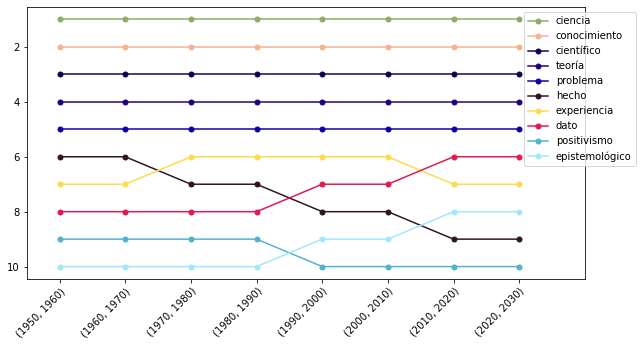

In [75]:
viz.plot_word_evolution_by_topic_graph(56) # This one is interesting

We save the topic plots to files in the results directory.

In [60]:
from pathlib import Path

TOPIC_PLOTS_FOLDER = Path().resolve() / "results" / "topic_plots"

TOPIC_PLOTS_FOLDER.mkdir(exist_ok=True)

In [ ]:
for topic in model.topics:
    if topic.is_trash:
        continue
    
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=144)

    topic_id = topic.topic_id
    viz.plot_word_evolution_by_topic_graph(topic_id, ax=ax1)
    viz.plot_number_of_documents_per_year_in_topic(topic_id, ax = ax2)
    ax1.legend(bbox_to_anchor=(-0.1, 1))

    _.tight_layout()

    _.savefig(TOPIC_PLOTS_FOLDER / f"{topic_id}.jpg")

In [ ]:
interesting_topics = [
    56, # Philosophy of science, stable
    58, # Moral philosophy
    60, # Merleau-Ponty, recent interest
    70, # Foucault/Benjamin, recent interest in Benjamin
    73, # Phil of Religion, growing interest in Levinas
    11, # Wittgenstein, interest in religious aspects
    16, # Skepticism, very recent interest
    20, # Marx, declining interest
    31, # Kantian political philosophy
    32, # Feminism, growing interest
    40, # McDowell, growing interest
    41, # Hermeneutics, growing interest in Ricoeur
    54, # Moral philosophy, stable, shift away from Kantian ethics
]